### In this study, My aim is to see what is the difference between selected variables and not selected variables (Feature Selection). 
### For this aim I'll use Diamond Prices dataset and linear, non-linear machine learning algorithms. Let's get started :)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Diamonds Prices2022.csv")
df=data.copy()
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [4]:
df.rename({"x":"length_in_mm","y":"width_in_mm","z":"depth_in_mm"},axis=1,inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53943.0,0.797935,0.473999,0.2,0.40,0.70,1.04,5.01
depth,53943.0,61.749322,1.432626,43.0,61.00,61.80,62.50,79.00
table,53943.0,57.457251,2.234549,43.0,56.00,57.00,59.00,95.00
price,53943.0,3932.734294,3989.338447,326.0,950.00,2401.00,5324.00,18823.00
length_in_mm,53943.0,5.731158,1.121730,0.0,4.71,5.70,6.54,10.74
width_in_mm,53943.0,5.734526,1.142103,0.0,4.72,5.71,6.54,58.90
depth_in_mm,53943.0,3.538730,0.705679,0.0,2.91,3.53,4.04,31.80


### We checked our info and describe functions and we can see there is no null values or nan values also there is no inappropriate values but some of 0.0 values in length_in_mm, width_in_mm and depth_in_mm. They are faulty values, they represents dimensionless. We should filter(drop) them.

In [6]:
df.describe(exclude=["float64","int64"]).T

,count,unique,top,freq
cut,53943,5,Ideal,21551
color,53943,7,G,11292
clarity,53943,8,SI1,13067


In [7]:
df=df[~(df["length_in_mm"]==0.0)]
df=df[~(df["width_in_mm"]==0.0)]
df=df[~(df["depth_in_mm"]==0.0)]
df.shape

(53923, 10)

##### We dropped 20 dimensionless values.

### Now let's check for outliers.

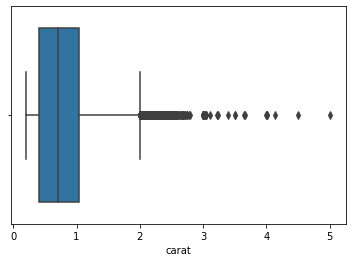

In [8]:
sns.boxplot(x="carat",data=df)
plt.show()

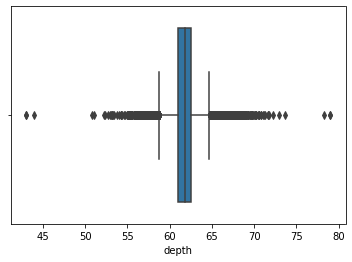

In [9]:
sns.boxplot(x="depth",data=df)
plt.show()

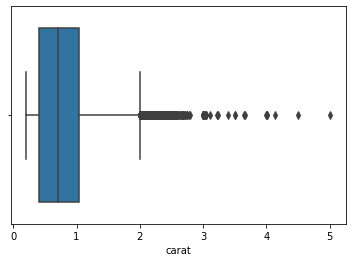

In [10]:
sns.boxplot(x="carat",data=df)
plt.show()

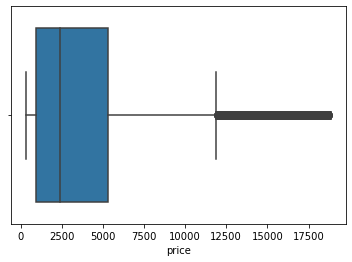

In [11]:
sns.boxplot(x="price",data=df)
plt.show()

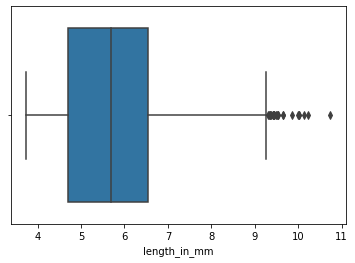

In [12]:
sns.boxplot(x="length_in_mm",data=df)
plt.show()

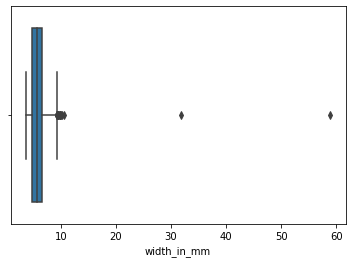

In [13]:
sns.boxplot(x="width_in_mm",data=df)
plt.show()

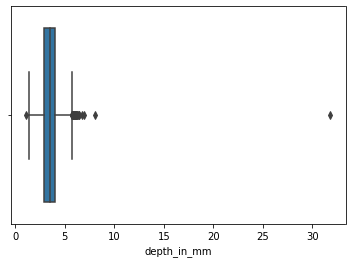

In [14]:
sns.boxplot(x="depth_in_mm",data=df)
plt.show()

In [15]:
def outlier (x):
    q3,q1=np.percentile(x,[75,25])
    IQR=q3-q1
    min_=q1-(1.5*IQR)
    max_=q3+(1.5*IQR)
    return q3,q1,min_,max_,df[x<min_].shape[0],df[x>max_].shape[0]

In [16]:
var_names=list(df.select_dtypes(["float64","int64"]))
for i in var_names:
    print("Feature:{}\nq3:{}\nq1:{}\nmin:{}\nmax:{}\nsize of x<min:{}\nsize of x>max:{}\n--------------".format(i
                                                             ,outlier(df[i])[0]
                                                             ,outlier(df[i])[1]
                                                             ,outlier(df[i])[2]
                                                             ,outlier(df[i])[3]
                                                             ,outlier(df[i])[4]
                                                             ,outlier(df[i])[5]))

Feature:carat
q3:1.04
q1:0.4
min:-0.5599999999999999
max:2.0
size of x<min:0
size of x>max:1883
--------------
Feature:depth
q3:62.5
q1:61.0
min:58.75
max:64.75
size of x<min:1504
size of x>max:1039
--------------
Feature:table
q3:59.0
q1:56.0
min:51.5
max:63.5
size of x<min:16
size of x>max:588
--------------
Feature:price
q3:5322.5
q1:949.0
min:-5611.25
max:11882.75
size of x<min:0
size of x>max:3534
--------------
Feature:length_in_mm
q3:6.54
q1:4.71
min:1.9649999999999999
max:9.285
size of x<min:0
size of x>max:24
--------------
Feature:width_in_mm
q3:6.54
q1:4.72
min:1.9899999999999993
max:9.27
size of x<min:0
size of x>max:22
--------------
Feature:depth_in_mm
q3:4.04
q1:2.91
min:1.2150000000000003
max:5.734999999999999
size of x<min:1
size of x>max:28
--------------


### We defined our outliers. Let's filter them.

In [17]:
df=df[~((df["carat"]<-0.5599999999999999)|(df["carat"]>2.0))]
df=df[~((df["depth"]<58.75)|(df["depth"]>64.75))]
df=df[~((df["table"]<51.5)|(df["table"]>63.5))]
df=df[~((df["price"]<-5611.25)|(df["price"]>11882.75))]
df=df[~((df["length_in_mm"]<1.9649999999999999)|(df["length_in_mm"]>9.285))]
df=df[~((df["width_in_mm"]<1.9899999999999993)|(df["width_in_mm"]>9.27))]
df=df[~((df["depth_in_mm"]<1.2150000000000003)|(df["depth_in_mm"]>5.734999999999999))]
df.shape

(47525, 10)

##### We've dropped 6398 values.

### Now let's make some inferences with our categorical variables for price variable.

In [18]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [19]:
df["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [20]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

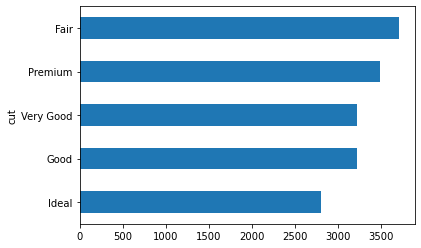

In [21]:
df.groupby("cut")["price"].mean().sort_values().plot(kind="barh")
plt.show()

In [22]:
df.groupby("cut").size().reset_index().sort_values(by=0,ascending=False)

,cut,0
2,Ideal,20339
3,Premium,12116
4,Very Good,10995
1,Good,3745
0,Fair,330


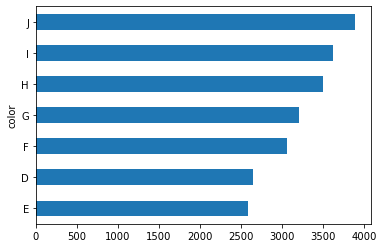

In [23]:
df.groupby("color")["price"].mean().sort_values().plot(kind="barh")
plt.show()

In [24]:
df.groupby("color").size().reset_index().sort_values(by=0,ascending=False)

,color,0
3,G,10081
1,E,8911
2,F,8467
4,H,7176
0,D,6195
5,I,4461
6,J,2234


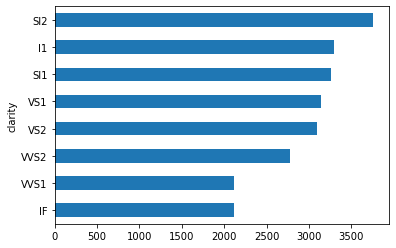

In [25]:
df.groupby("clarity")["price"].mean().sort_values().plot(kind="barh")
plt.show()

In [26]:
df.groupby("clarity").size().reset_index().sort_values(by=0,ascending=False)

,clarity,0
2,SI1,11553
5,VS2,10929
3,SI2,7402
4,VS1,7373
7,VVS2,4682
6,VVS1,3463
1,IF,1650
0,I1,473


### Before we go feature selection, let's change our object dtypes variables to numerical values.

In [27]:
new_cut=[]
for i in df["cut"]:
    if i == "Fair":
        new_cut.append(1)
    elif i == "Good":
        new_cut.append(2)
    elif i == "Very Good":
        new_cut.append(3)
    elif i == "Ideal":
        new_cut.append(4)
    elif i == "Premium":
        new_cut.append(5)
df=df.drop("cut",axis=1)
df["new_cut"]=new_cut
df.head()

,carat,color,clarity,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,new_cut
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43,4
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31,5
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63,5
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2
5,0.24,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3


In [28]:
df["clarity"].unique()

array(['SI2', 'SI1', 'VS2', 'VVS2', 'VVS1', 'VS1', 'I1', 'IF'],
      dtype=object)

In [29]:
new_clarity=[]
for i in df["clarity"]:
    if i == "SI2":
        new_clarity.append(1)
    elif i == "SI1":
        new_clarity.append(2)
    elif i == "VS2":
        new_clarity.append(3)
    elif i == "VS1":
        new_clarity.append(4)
    elif i == "VVS2":
        new_clarity.append(5)
    elif i == "VVS1":
        new_clarity.append(6)
    elif i == "IF":
        new_clarity.append(7)
    elif i == "I1":
        new_clarity.append(8)
df=df.drop("clarity",axis=1)
df["new_clarity"]=new_clarity
df.head()

,carat,color,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,new_cut,new_clarity
0,0.23,E,61.5,55.0,326,3.95,3.98,2.43,4,1
1,0.21,E,59.8,61.0,326,3.89,3.84,2.31,5,2
3,0.29,I,62.4,58.0,334,4.20,4.23,2.63,5,3
4,0.31,J,63.3,58.0,335,4.34,4.35,2.75,2,1
5,0.24,J,62.8,57.0,336,3.94,3.96,2.48,3,5


### I changed them like this because this variables are ordinal variables.
### I'll use pd.get_dummies() for color variable because it's nominal variable and I'll drop first variable because multicollinearity.

In [30]:
df=pd.get_dummies(df,columns=["color"],drop_first=True)
df.head()

,carat,depth,table,price,length_in_mm,width_in_mm,depth_in_mm,new_cut,new_clarity,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,4,1,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,5,2,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,5,3,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,2,1,0,0,0,0,0,1
5,0.24,62.8,57.0,336,3.94,3.96,2.48,3,5,0,0,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47525 entries, 0 to 53942
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         47525 non-null  float64
 1   depth         47525 non-null  float64
 2   table         47525 non-null  float64
 3   price         47525 non-null  int64  
 4   length_in_mm  47525 non-null  float64
 5   width_in_mm   47525 non-null  float64
 6   depth_in_mm   47525 non-null  float64
 7   new_cut       47525 non-null  int64  
 8   new_clarity   47525 non-null  int64  
 9   color_E       47525 non-null  uint8  
 10  color_F       47525 non-null  uint8  
 11  color_G       47525 non-null  uint8  
 12  color_H       47525 non-null  uint8  
 13  color_I       47525 non-null  uint8  
 14  color_J       47525 non-null  uint8  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 3.9 MB


### Now we are ready for pairplot-regplot-heatmap and feature selection. I'll use correlation-heatmap-sklearn for future selection.

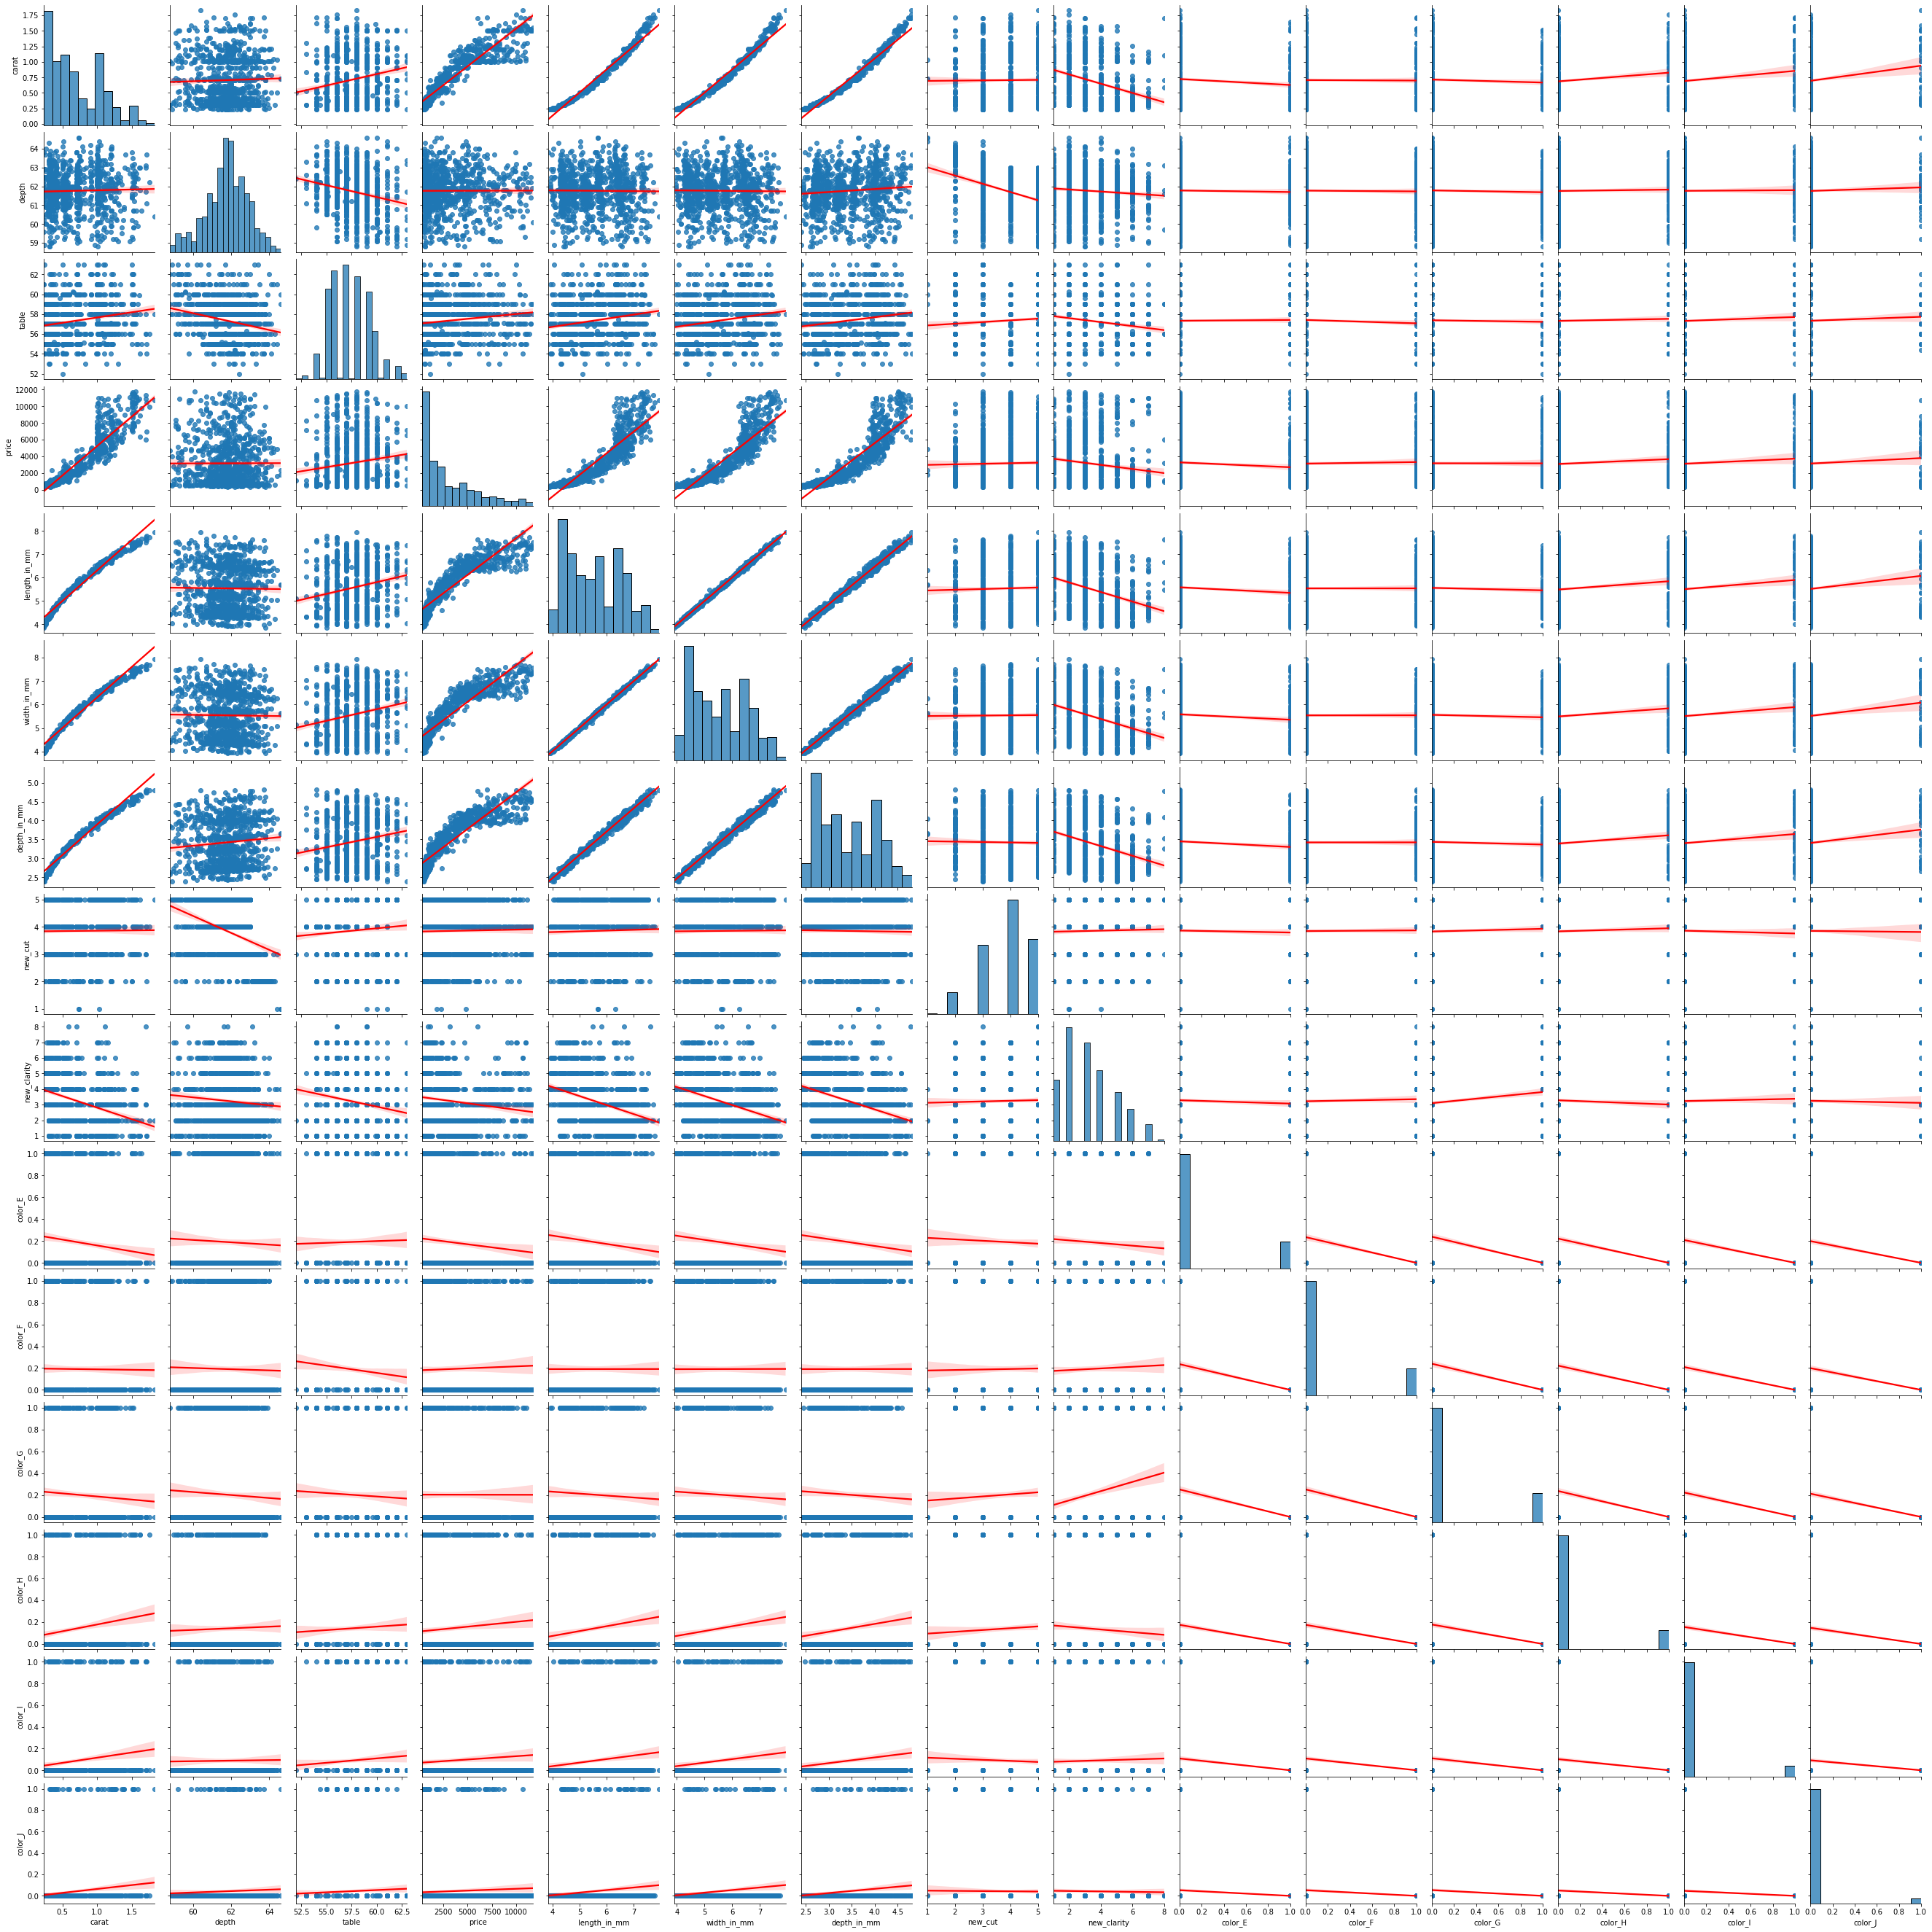

In [32]:
# I used sample function because pairplot takes too much time.
sns.pairplot(df.sample(1000), kind="reg", plot_kws={"line_kws":{"color":"red"}})
plt.show()

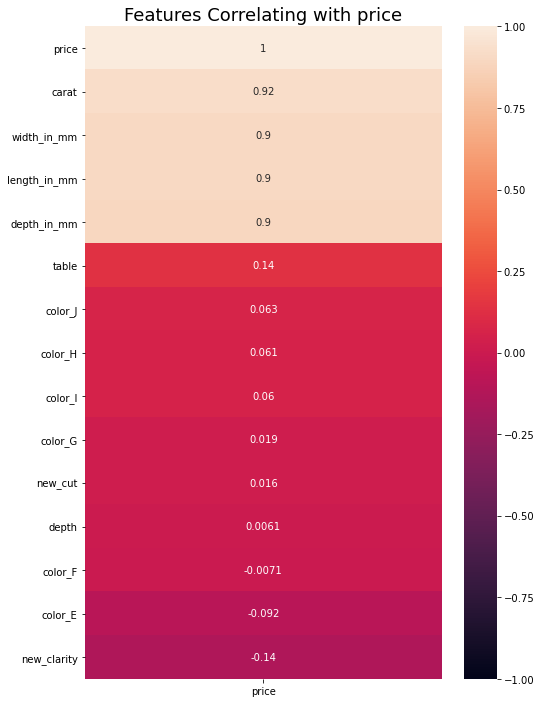

In [33]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[["price"]].sort_values(by="price",ascending=False),vmin=-1,vmax=1,annot=True)
heatmap.set_title("Features Correlating with price"
                  ,fontdict={"fontsize":18});

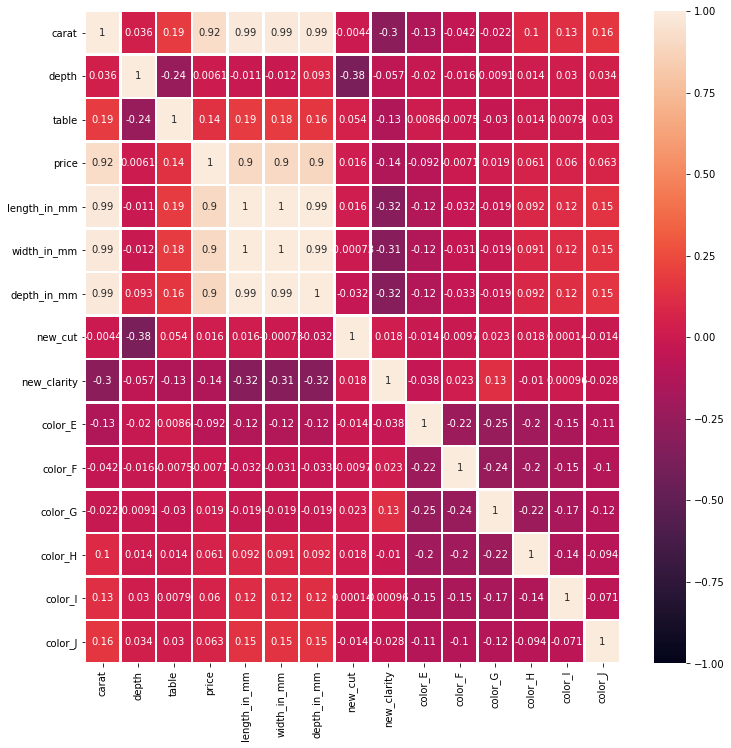

In [34]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=1.5,vmax=1,vmin=-1)
plt.show()

In [35]:
from sklearn.feature_selection import SelectKBest, chi2

In [36]:
X=df.drop("price",axis=1)
y=df["price"]

In [37]:
bestfeatures = SelectKBest(score_func=chi2,k=10).fit(X,y)
dfscores = pd.DataFrame(bestfeatures.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Scores']
print(featureScores.sort_values(by="Scores",ascending=False))

           Specs        Scores
7    new_clarity  17724.127531
13       color_J  14542.329494
11       color_H  12789.119086
12       color_I  12616.638688
8        color_E  12530.373598
9        color_F  12456.768354
10       color_G  11794.760006
0          carat   8794.191362
3   length_in_mm   7891.197014
4    width_in_mm   7798.180017
5    depth_in_mm   4870.006817
6        new_cut   2756.994721
2          table    836.994987
1          depth    207.787069


### This variables has high correlation with price variable: 
##### length_in_mm, width_in_mm, depth_in_mm and carat
### But also they have low score against other variables. 
### I'll keep all the features in the df_all_features and I'll keep the highly correlated variables in df_high_correlated. And I'll use both for linear and non-linear regression.

In [38]:
df_all_features=df.copy()
df_high_correlated=df[["carat","length_in_mm","width_in_mm","depth_in_mm","price"]]

In [39]:
# Our linear library for algorithm
from sklearn.linear_model import LinearRegression
# Our non-linear library for algorithm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

#### Linear model for df_all_features

In [40]:
X=df_all_features.drop("price",axis=1)
y=df_all_features["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)
linear_model=LinearRegression().fit(X_train_scaled,y_train)
print("Intercept:{}\nCoefficients:{}".format(linear_model.intercept_,linear_model.coef_))

Intercept:3116.3392531492864
Coefficients:[ 4039.25134482   -22.38936343   -97.82425182 -2195.53724711
  1567.13036439  -627.7856333     65.6807422    413.7409853
   -59.80700172   -72.6276328   -119.92284541  -244.77494414
  -311.0519627   -350.29768765]


In [41]:
y_pred_train_linear_all_features=linear_model.predict(X_train_scaled)
y_pred_test_linear_all_features=linear_model.predict(X_test_scaled)
r2_score_train=r2_score(y_train,y_pred_train_linear_all_features)
r2_score_test=r2_score(y_test,y_pred_test_linear_all_features)
r2_score_train,r2_score_test,np.sqrt(mean_squared_error(y_test,y_pred_test_linear_all_features))

(0.8997564019663421, 0.8962785877207913, 878.9710329259261)

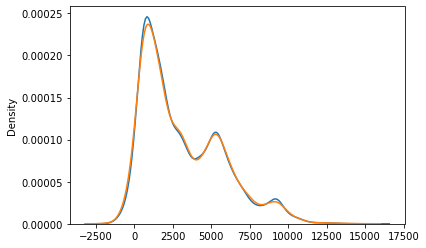

In [42]:
sns.kdeplot(y_pred_train_linear_all_features)
sns.kdeplot(y_pred_test_linear_all_features)
plt.show()

#### Non-Linear model for df_all_features

In [43]:
X=df_all_features.drop("price",axis=1)
y=df_all_features["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)
non_linear_model=KNeighborsRegressor().fit(X_train_scaled,y_train)
non_linear_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [44]:
y_pred_train_non_linear_all_features=non_linear_model.predict(X_train_scaled)
y_pred_test_non_linear_all_features=non_linear_model.predict(X_test_scaled)
r2_score_train=r2_score(y_train,y_pred_train_non_linear_all_features)
r2_score_test=r2_score(y_test,y_pred_test_non_linear_all_features)
r2_score_train,r2_score_test,np.sqrt(mean_squared_error(y_test,y_pred_test_non_linear_all_features))

(0.9774923239388396, 0.962565350119508, 530.411997748603)

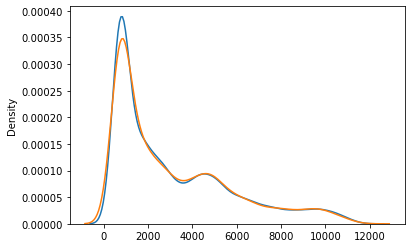

In [45]:
sns.kdeplot(y_pred_train_non_linear_all_features)
sns.kdeplot(y_pred_test_non_linear_all_features)
plt.show()

### Conclusions for df_all_features and linear regression:
#### 1- High train and test scores.
#### 2- At first look no overfitting or underfitting.
#### 3- MSE is low profile.
#### 4- Pred_train and pred_test distributions are says no overfitting or underfitting.
### Conclusions for df_all_features and non-linear regression:
#### 1- Higher train and test scores against linear regression.
#### 2- At first look there is -%2 difference between r2_train and r2_test scores.
#### 3- MSE is lower then linear regression.
#### 4- Pred_train and pred_test distributions are says no overfitting or underfitting.

##### Linear model for df_high_correlated

In [46]:
X=df_high_correlated.drop("price",axis=1)
y=df_high_correlated["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)
linear_model=LinearRegression().fit(X_train_scaled,y_train)
print("Intercept:{}\nCoefficients:{}".format(linear_model.intercept_,linear_model.coef_))

Intercept:3123.4923547400645
Coefficients:[ 3773.0991371  -1967.23216068  1932.35408572 -1204.20069391]


In [47]:
y_pred_train_linear_correlated=linear_model.predict(X_train_scaled)
y_pred_test_linear_correlated=linear_model.predict(X_test_scaled)
r2_score_train=r2_score(y_train,y_pred_train_linear_correlated)
r2_score_test=r2_score(y_test,y_pred_test_linear_correlated)
r2_score_train,r2_score_test,np.sqrt(mean_squared_error(y_test,y_pred_test_linear_correlated))

(0.8587720318414371, 0.8580119410206228, 1018.9097729279155)

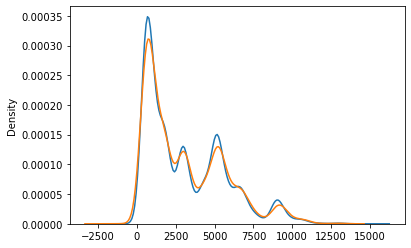

In [48]:
sns.kdeplot(y_pred_train_linear_correlated)
sns.kdeplot(y_pred_test_linear_correlated)
plt.show()

##### Non-Linear Model for df_high_correlated

In [49]:
X=df_high_correlated.drop("price",axis=1)
y=df_high_correlated["price"]
X_train, X_test, y_train, y_test = train_test_split(X,y)
X_train_scaled=StandardScaler().fit_transform(X_train)
X_test_scaled=StandardScaler().fit_transform(X_test)
non_linear_model=KNeighborsRegressor().fit(X_train_scaled,y_train)
non_linear_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [50]:
y_pred_train_non_linear_correlated=non_linear_model.predict(X_train_scaled)
y_pred_test_non_linear_correlated=non_linear_model.predict(X_test_scaled)
r2_score_train=r2_score(y_train,y_pred_train_non_linear_correlated)
r2_score_test=r2_score(y_test,y_pred_test_non_linear_correlated)
r2_score_train,r2_score_test,np.sqrt(mean_squared_error(y_test,y_pred_test_non_linear_correlated))

(0.9022437437645279, 0.8617207887710788, 1026.1915672712364)

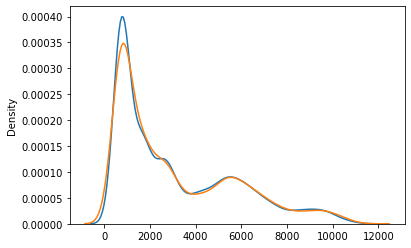

In [51]:
sns.kdeplot(y_pred_train_non_linear_correlated)
sns.kdeplot(y_pred_test_non_linear_correlated)
plt.show()

### Conclusions for df_high_correlated and linear regression:
#### 1- Low train and test scores then df_all_features which this is what we don't want to see.(Probably because of there are less features.)
#### 2- At first look no overfitting or underfitting.
#### 3- MSE is higher then df_all_features.
#### 4- Pred_train and pred_test distributions are says no overfitting or underfitting.
### Conclusions for df_high_correlated and non-linear regression:
#### 1- Low train and test scores then df_all_features.
#### 2- There is high difference between train and test scores (around -%5) then df_all_features.
#### 3- MSE is higher then linear regression.
#### 4- Pred_train and pred_test distributions are says no overfitting or underfitting.

### Generally feature selection is not worked that way I expected. I think, I need more time to learn over feature selection. It's shaping in my mind but not shaped yet. At the next case study it will be work that way I want I think. But till then I need more article. 
##### Thank you for your precious time :)